In [1]:
import zipfile
import pandas as pd
import numpy as np

In [2]:
train_zip = zipfile.ZipFile('training.zip')
train_zip.extractall()

test_zip = zipfile.ZipFile('test.zip')
test_zip.extractall()

In [3]:
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [5]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [6]:
train_data.fillna(method='ffill', inplace=True)

In [7]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [8]:
imag = []
for i in range(0, 7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)
np.array(imag).shape

(7049, 9216)

In [54]:
image_arr = np.array(imag, dtype='float')
X_train = image_arr.reshape(-1, 96, 96, 1)

In [55]:
X_train[0].shape

(96, 96, 1)

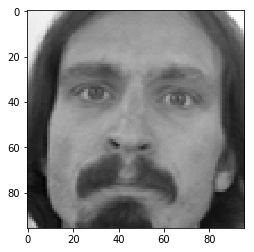

In [28]:
# plot one example image

from matplotlib import pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.show()

In [46]:
# 除去 Image 外的数据

point_info = list(train_data.T[0][:-1])
np.array(point_info).shape

(30,)

In [29]:
# 收集人脸关键点的数据和提取标签

point_data = [] # used for plotting
y_train = [] # labels
for i in range(0, 7049):
    # 一个人脸的数据,15对(x,y)坐标数据
    point_info = np.array(train_data.T[i][:-1])
    # 所有人脸的数据
    point_data.append(point_info.reshape(15,-1))
    y_train.append(point_info)

In [48]:
point_data = np.array(point_data)
y_train = np.array(y_train, dtype='float')

In [49]:
point_data.shape

(7049, 15, 2)

In [50]:
y_train.shape

(7049, 30)

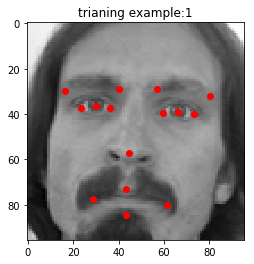

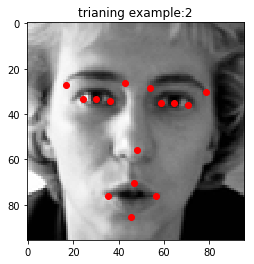

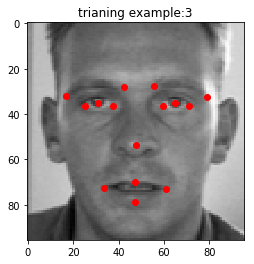

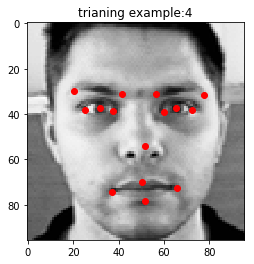

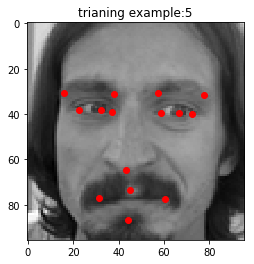

In [141]:
# 5 examples for train data
for i in range(0,5):
    for j in range(0, 15):
        plt.plot(point_data[i][j][0],point_data[i][j][1], 'ro')
    plt.title("trianing example:%s" % (i+1))
    plt.imshow(X_train[i].reshape(96,96), cmap='gray')
    plt.show()

In [62]:
X_train.shape[1:]

(96, 96, 1)

In [63]:
y_train.shape[1]

30

In [87]:
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.callbacks import *
from keras import utils

# build CNN model 

def CNN_model():
    
    input_data = Input(X_train.shape[1:])
    
    c1 = Conv2D(32, (3,3), activation='relu')(input_data)
    c1 = BatchNormalization()(c1)
    s1 = MaxPooling2D()(c1)
    
    c2 = Conv2D(64, (2,2), activation='relu')(s1)
    s2 = MaxPooling2D()(c2)
    
    c3 = Conv2D(128, (2,2), activation='relu')(s2)
    s3 = MaxPooling2D()(c3)
    
    f = Flatten()(s3)
    f = Dense(1024, activation='relu')(f)
    f = Dropout(0.5)(f)
    f = Dense(1024, activation='relu')(f)
    f = Dropout(0.6)(f)
    output = Dense(y_train.shape[1])(f)
    
    model = Model(inputs=input_data, outputs=output)
    return model

In [88]:
model = CNN_model()
#optimizer = SGD(lr=0.03, momentum=0.9, nesterov=True)
#model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
epoch_num = 500
#learning_rate = np.linspace(0.03, 0.01, epoch_num)
#change_lr = LearningRateScheduler(lambda epoch: float(learning_rate[epoch]))
#early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
#check_point= ModelCheckpoint('CNN_model_final.h5', monitor='val_loss',
#                             verbose=0,save_best_only=True,save_weights_only=False, mode='auto', period=1)

adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=adam,
              loss='mse',
              metrics=['mae', 'accuracy'])

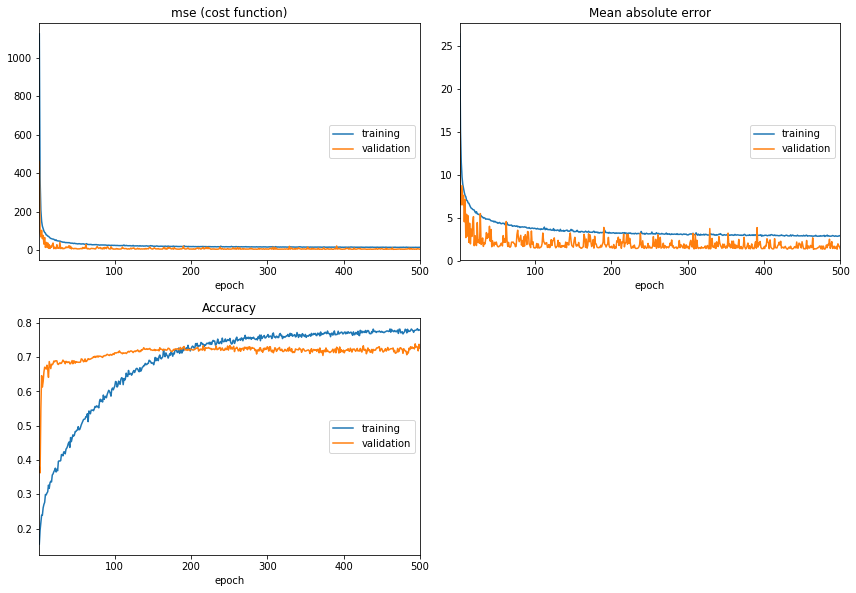

mse (cost function):
training   (min:   14.228, max: 1123.410, cur:   14.868)
validation (min:    4.539, max:  459.548, cur:    5.127)

Mean absolute error:
training   (min:    2.803, max:   26.399, cur:    2.864)
validation (min:    1.307, max:   15.114, cur:    1.389)

Accuracy:
training   (min:    0.155, max:    0.783, cur:    0.779)
validation (min:    0.362, max:    0.739, cur:    0.727)


In [89]:
from livelossplot import PlotLossesKeras

model.fit(X_train, y_train,
         epochs=epoch_num, batch_size=128,
         validation_split=0.2,
         callbacks=[PlotLossesKeras()],
         verbose=1)

In [99]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
ImageId    1783 non-null int64
Image      1783 non-null object
dtypes: int64(1), object(1)
memory usage: 27.9+ KB


In [98]:
timag = []
for i in range(0, 1783):
    img = test_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    timag.append(img)
np.array(timag).shape

(1783, 9216)

In [118]:
timage_arr = np.array(timag, dtype='float')
X_test = timage_arr.reshape(-1, 96, 96, 1)

In [122]:
X_test[1].shape

(96, 96, 1)

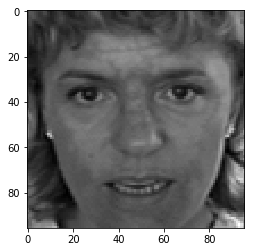

In [123]:
plt.imshow(X_test[1].reshape(96,96), cmap='gray')
plt.show()

In [124]:
pred = model.predict(X_test)

In [125]:
pred.shape

(1783, 30)

In [129]:
pred[0].shape

(30,)

In [130]:
# 收集测试集人脸关键点的数据和提取标签

tpoint_data = [] # used for plotting
for i in range(0, 1782):
    # 一个人脸的数据,15对(x,y)坐标数据
    point_info = np.array(pred[i])
    # 所有人脸的数据
    tpoint_data.append(point_info.reshape(15,-1))

In [133]:
tpoint_data = np.array(tpoint_data)
tpoint_data.shape

(1782, 15, 2)

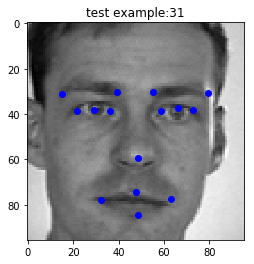

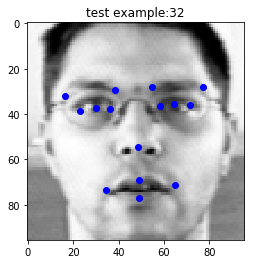

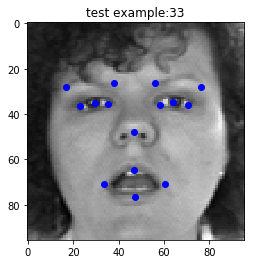

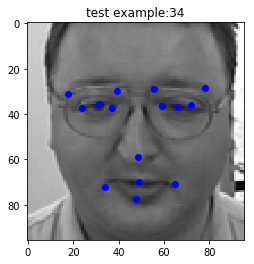

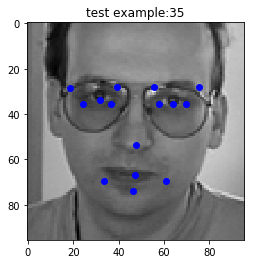

In [147]:
# 5 examples for test data
for i in range(30,35):
    for j in range(0, 15):
        plt.plot(tpoint_data[i][j][0],tpoint_data[i][j][1], 'bo')
    plt.title("test example:%s" % (i+1))
    plt.imshow(X_test[i].reshape(96,96), cmap='gray')
    plt.show()

In [149]:
look_table = pd.read_csv('IdLookupTable.csv')

In [155]:
look_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 4 columns):
RowId          27124 non-null int64
ImageId        27124 non-null int64
FeatureName    27124 non-null object
Location       0 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 847.7+ KB


In [158]:
lookid_list = list(look_table['FeatureName'])

(27124,)

In [160]:
imageID = list(look_table['ImageId'] - 1)

In [161]:
pre_list = list(pred)

In [163]:
rowid = list(look_table['RowId'])

In [165]:
feature = []
for f in lookid_list:
    feature.append(lookid_list.index(f))

In [167]:
pre_list[0][1]

34.051384

In [169]:
preded = []
for x,y in zip(imageID, feature):
    preded.append(pre_list[x][y])

In [170]:
rowid = pd.Series(rowid, name='RowId')a
loc = pd.Series(preded, name='Location')

In [173]:
submission = pd.concat([rowid, loc], axis=1)

In [174]:
submission.to_csv('submission.csv', index=False)